In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the dataset from csv file to a python pandas dataframe
df = pd.read_csv(r"D:\Project - Forecasting Power Consumption\04-04-2024 to 18-04-2024\Data(.csv)\elog20240407.csv",
                  sep = ";",
                  na_values=["NA", "NaN", "Missing", "Null", "NULL"])
#column names contain IOITSecure447> which is not useful at all and hence is dropped
#Changing column names as per our preferences
new_column_names = [col.split(">", 1)[-1].strip() for col in df.columns]
df.columns = new_column_names

In [3]:
df.head().T

,0,1,2,3,4
TIME,07/04/2024 00:00:01,07/04/2024 00:00:11,07/04/2024 00:00:21,07/04/2024 00:00:31,07/04/2024 00:00:41
R Ph Voltage,235.2,234.92,234.92,234.8,234.8
Y Ph Voltage,236.4,236.2,236.2,235.99,235.99
B Ph Voltage,238.05,237.85,237.85,237.71,237.71
Average Phase Voltage,236.51,236.35,236.35,236.18,236.18
RY Line Voltage,409.69,409.46,409.46,409.12,409.12
YB Line Voltage,408.17,407.89,407.89,407.61,407.61
BR Line Voltage,411.05,410.84,410.84,410.48,410.48
R Phase Line current,35.09,35.13,35.13,35.22,35.22
Y Phase Line current,34.0,33.97,33.97,34.18,34.18


### In this module, we are interested with the Active Power only.
The columns are:
1. R- Phase Active Power
2. Y- Phase Active Power
3. B- Phase Active Power
4. 3 Phase Active Power

Hence, we shall make a new dataframe consisting of these columns only and predict those values

In [4]:
data = df[[ "TIME", "R- Phase Active Power", "Y- Phase Active Power",
           "B- Phase Active Power", "3 Phase Active Power"]].copy()

In [5]:
data.head()

,TIME,R- Phase Active Power,Y- Phase Active Power,B- Phase Active Power,3 Phase Active Power
0,07/04/2024 00:00:01,7.18,7.10,5.41,19.68
1,07/04/2024 00:00:11,7.18,7.10,5.41,19.68
2,07/04/2024 00:00:21,7.17,7.09,5.42,19.65
3,07/04/2024 00:00:31,7.18,7.13,5.43,19.74
4,07/04/2024 00:00:41,7.18,7.13,5.43,19.74


# Exploratory Data Analysis

In [6]:
data.shape

(8640, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TIME                   8640 non-null   object 
 1   R- Phase Active Power  8640 non-null   float64
 2   Y- Phase Active Power  8640 non-null   float64
 3   B- Phase Active Power  8640 non-null   float64
 4   3 Phase Active Power   8640 non-null   float64
dtypes: float64(4), object(1)
memory usage: 337.6+ KB


In [8]:
data.isnull().sum()

TIME                     0
R- Phase Active Power    0
Y- Phase Active Power    0
B- Phase Active Power    0
3 Phase Active Power     0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.nunique()

TIME                     8640
R- Phase Active Power     414
Y- Phase Active Power     688
B- Phase Active Power     538
3 Phase Active Power     1228
dtype: int64

In [11]:
data.describe()

,R- Phase Active Power,Y- Phase Active Power,B- Phase Active Power,3 Phase Active Power
count,8640.000000,8640.000000,8640.000000,8640.000000
mean,5.946020,7.332985,6.060556,19.338353
std,0.887718,2.480592,1.346955,4.082006
min,4.120000,4.270000,4.190000,13.160000
25%,5.460000,4.970000,5.140000,15.630000
50%,5.950000,6.690000,5.390000,18.270000
75%,6.320000,9.800000,6.860000,22.950000
max,9.840000,13.080000,11.670000,31.840000


In [12]:
num_data = data.select_dtypes(include = "number")

In [13]:
Q1 = np.percentile(num_data, 25)
Q3 = np.percentile(num_data, 75)

IQR = Q3 - Q1

In [14]:
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

Q1: 5.33, Q3: 13.1, IQR: 7.77


(array([0, 1, 2, 3]),
 [Text(0, 0, 'R- Phase Active Power'),
  Text(1, 0, 'Y- Phase Active Power'),
  Text(2, 0, 'B- Phase Active Power'),
  Text(3, 0, '3 Phase Active Power')])

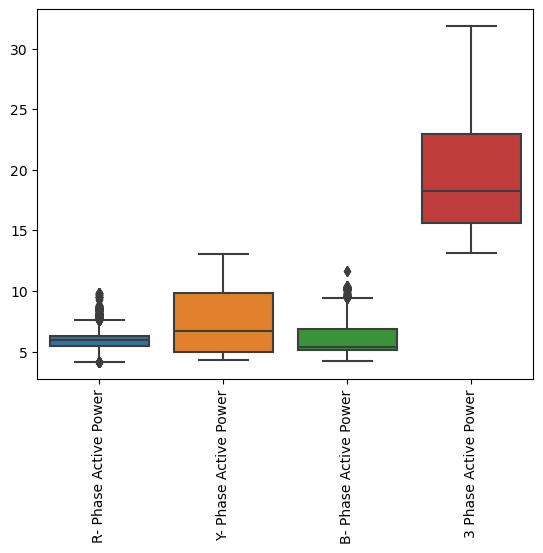

In [15]:
sns.boxplot(num_data)
plt.xticks(rotation = "vertical")

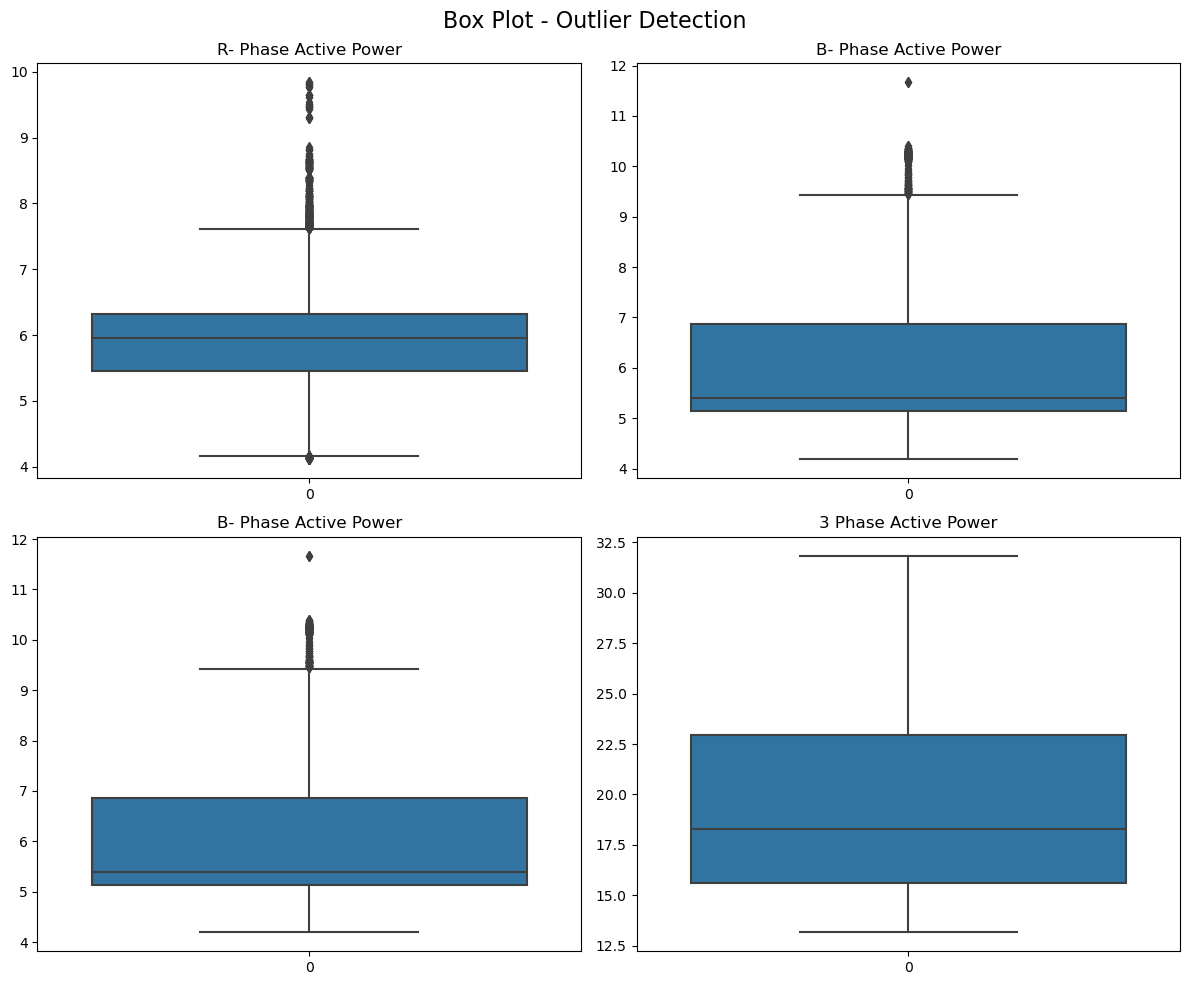

In [16]:
columns = ["R- Phase Active Power", "B- Phase Active Power", "B- Phase Active Power", "3 Phase Active Power"]
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
for ax, column in zip(axs.flatten(), columns):
    sns.boxplot(data[column], ax = ax)
    ax.set_title(column)
fig.suptitle("Box Plot - Outlier Detection", fontsize = 16)
plt.tight_layout()
plt.show()

In [17]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [18]:
filtered_data = num_data[(num_data >= lower_bound) & (num_data <= upper_bound)
]
# Print summary
print(f"Original data size: {num_data.shape}")
print(f"Filtered data size: {filtered_data.shape}")

Original data size: (8640, 4)
Filtered data size: (8640, 4)


### Hence, our dataset has no null values or outliers.

# Statistical Analysis

In [19]:
data.min()

TIME                     07/04/2024 00:00:01
R- Phase Active Power                   4.12
Y- Phase Active Power                   4.27
B- Phase Active Power                   4.19
3 Phase Active Power                   13.16
dtype: object

In [20]:
data.max()

TIME                     07/04/2024 23:59:51
R- Phase Active Power                   9.84
Y- Phase Active Power                  13.08
B- Phase Active Power                  11.67
3 Phase Active Power                   31.84
dtype: object

In [21]:
num_data.mean()

R- Phase Active Power     5.946020
Y- Phase Active Power     7.332985
B- Phase Active Power     6.060556
3 Phase Active Power     19.338353
dtype: float64

In [23]:
num_data.median()

R- Phase Active Power     5.95
Y- Phase Active Power     6.69
B- Phase Active Power     5.39
3 Phase Active Power     18.27
dtype: float64

In [24]:
num_data.std()

R- Phase Active Power    0.887718
Y- Phase Active Power    2.480592
B- Phase Active Power    1.346955
3 Phase Active Power     4.082006
dtype: float64

In [25]:
num_data.var()

R- Phase Active Power     0.788044
Y- Phase Active Power     6.153335
B- Phase Active Power     1.814287
3 Phase Active Power     16.662772
dtype: float64

In [26]:
num_data.corr()

,R- Phase Active Power,Y- Phase Active Power,B- Phase Active Power,3 Phase Active Power
R- Phase Active Power,1.000000,0.464677,0.454852,0.649046
Y- Phase Active Power,0.464677,1.000000,0.714744,0.944457
B- Phase Active Power,0.454852,0.714744,1.000000,0.863012
3 Phase Active Power,0.649046,0.944457,0.863012,1.000000


In [27]:
num_data.cov()

,R- Phase Active Power,Y- Phase Active Power,B- Phase Active Power,3 Phase Active Power
R- Phase Active Power,0.788044,1.023249,0.543874,2.351929
Y- Phase Active Power,1.023249,6.153335,2.388133,9.563368
B- Phase Active Power,0.543874,2.388133,1.814287,4.745081
3 Phase Active Power,2.351929,9.563368,4.745081,16.662772


In [28]:
num_data.skew(axis = 0)

R- Phase Active Power    0.719635
Y- Phase Active Power    0.657801
B- Phase Active Power    1.270422
3 Phase Active Power     0.593646
dtype: float64

In [29]:
num_data.skew(axis = 1)

0       1.906371
1       1.906371
2       1.908136
3       1.907594
4       1.907594
          ...   
8635    1.926252
8636    1.926252
8637    1.944090
8638    1.944090
8639    1.962567
Length: 8640, dtype: float64

In [30]:
num_data.kurt(axis = 0)

R- Phase Active Power    1.487181
Y- Phase Active Power   -0.914006
B- Phase Active Power    1.208781
3 Phase Active Power    -0.667603
dtype: float64

In [31]:
num_data.kurt(axis = 1)

0       3.725282
1       3.725282
2       3.730098
3       3.728766
4       3.728766
          ...   
8635    3.760325
8636    3.760325
8637    3.823831
8638    3.823831
8639    3.880555
Length: 8640, dtype: float64

# Data Visualization

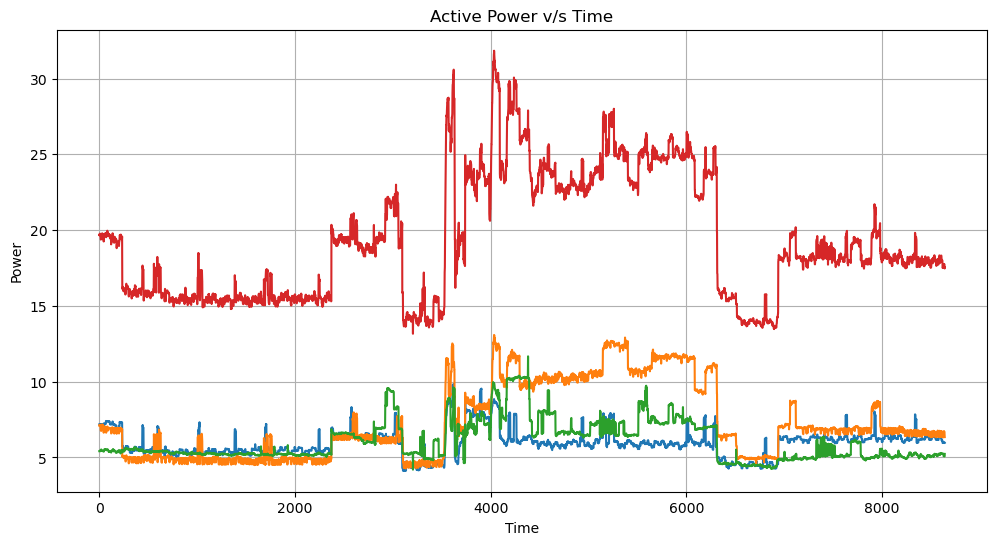

In [32]:
plt.figure(figsize = (12, 6))
plt.plot(num_data)
plt.title("Active Power v/s Time")
plt.xlabel("Time")
plt.ylabel("Power")
plt.grid(True)
plt.show()

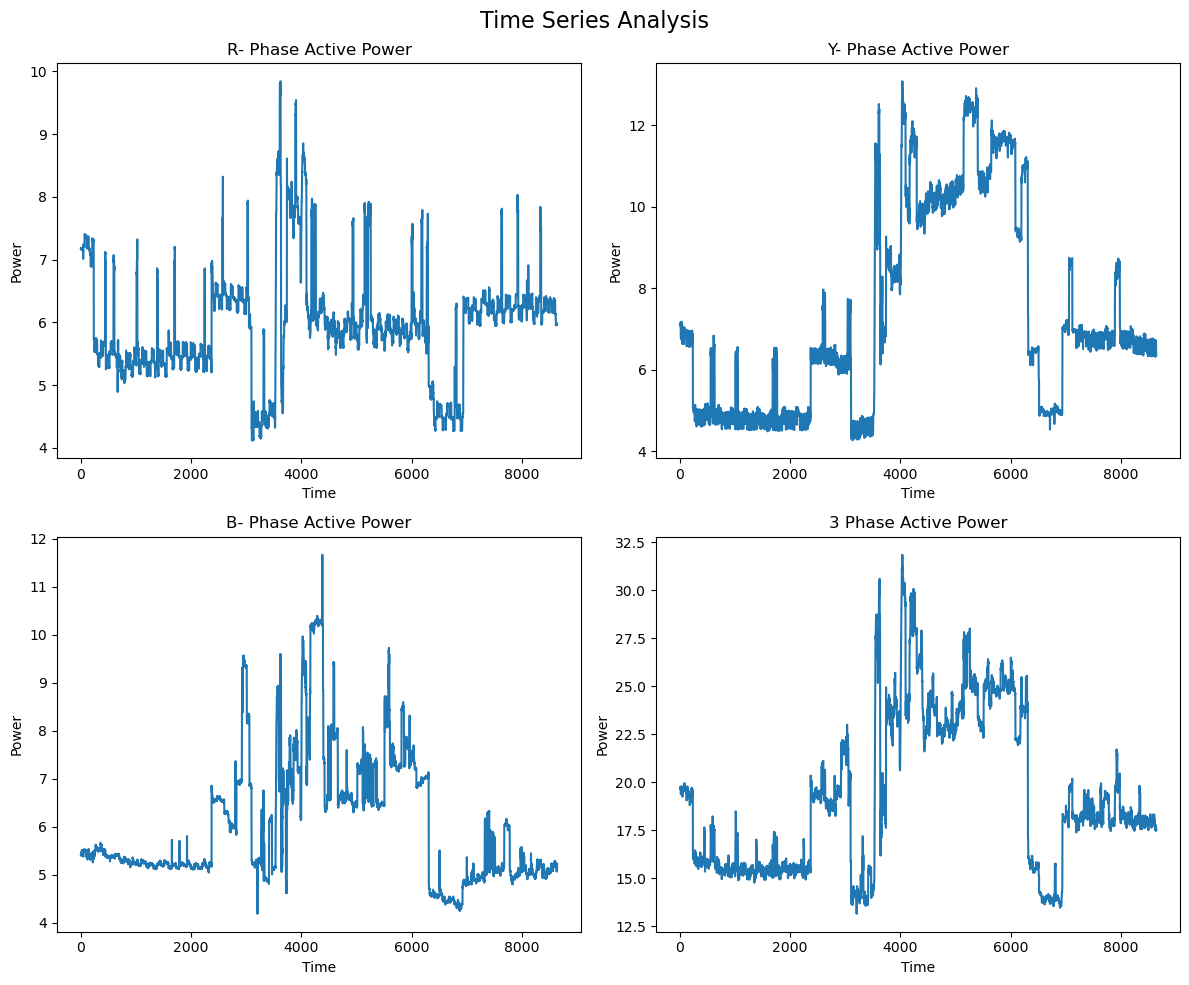

In [33]:
columns = ["R- Phase Active Power", "Y- Phase Active Power", "B- Phase Active Power", "3 Phase Active Power"]
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
for ax, column in zip(axs.flatten(), columns):
    ax.plot(data[column])
    ax.set_title(column)
    ax.set_xlabel("Time")
    ax.set_ylabel("Power")
fig.suptitle("Time Series Analysis", fontsize=16)
plt.tight_layout()
plt.show()

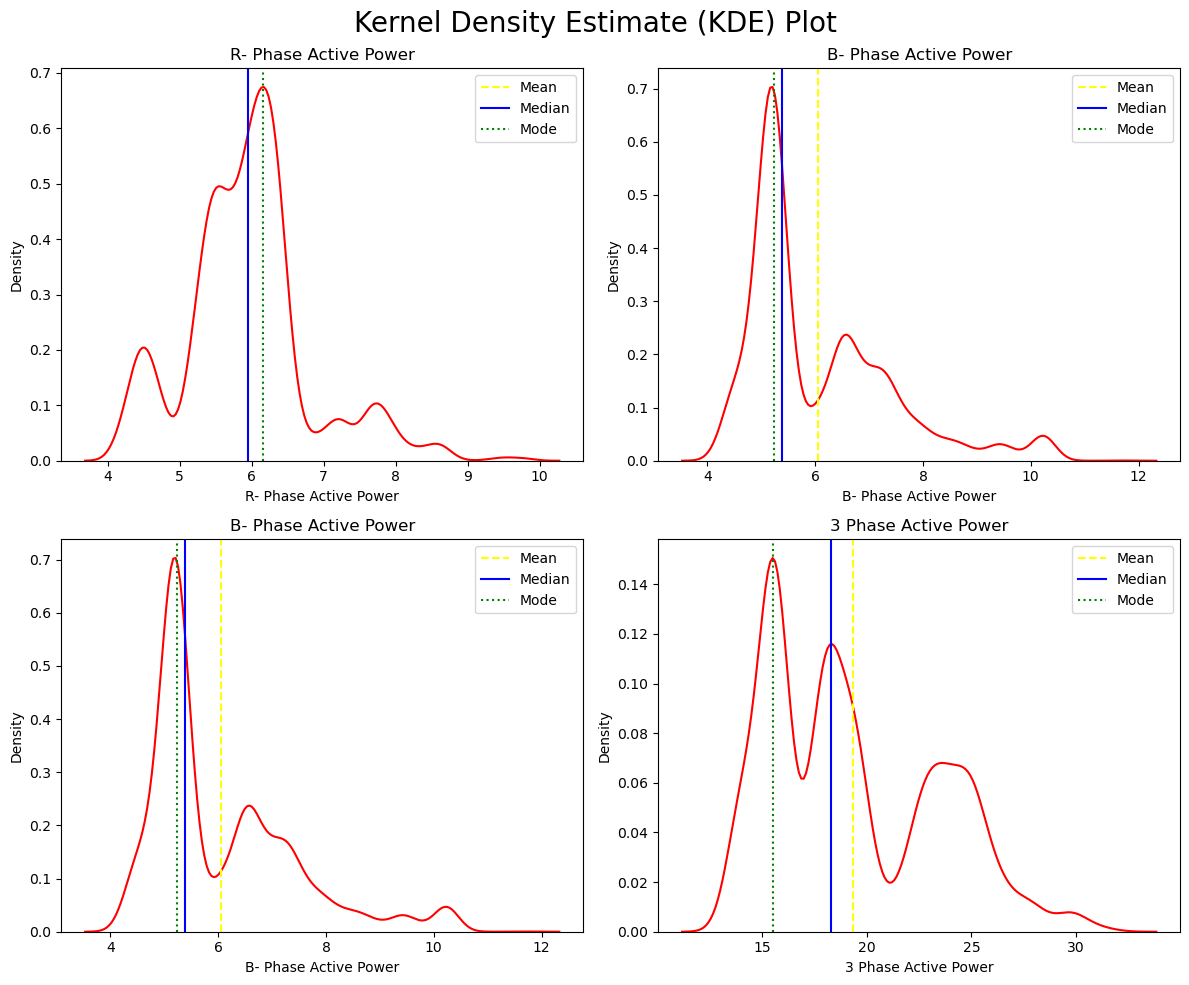

In [34]:
columns = ["R- Phase Active Power", "B- Phase Active Power", "B- Phase Active Power", "3 Phase Active Power"]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Iterate through the subplots and corresponding columns
for ax, column in zip(axs.flatten(), columns):
    sns.kdeplot(data[column], color = "red", ax = ax)
    ax.set_title(column)
    
    # Find the mean, median, mode
    mean_value = data[column].mean()
    median_value = data[column].median()
    mode_value = statistics.mode(data[column])
    
    # Add vertical lines at the position of mean, median, mode
    ax.axvline(mean_value, color = "yellow", label="Mean", linestyle = "--")
    ax.axvline(median_value, color = "blue", label="Median", linestyle = "-")
    ax.axvline(mode_value, color = "green", label="Mode", linestyle = ":")
    
    ax.legend()
    
fig.suptitle("Kernel Density Estimate (KDE) Plot", fontsize=20)

plt.tight_layout()
plt.show()

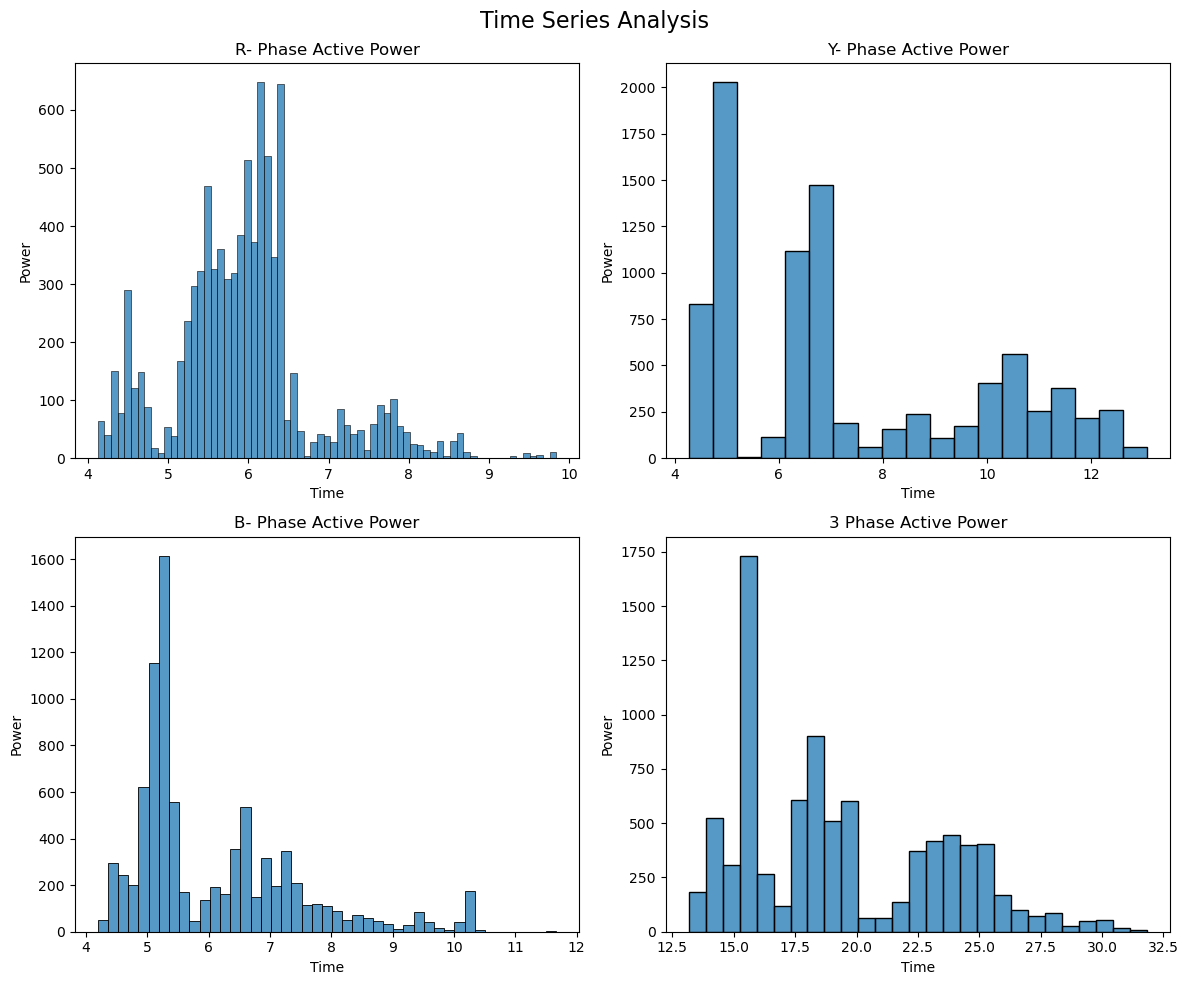

In [35]:
columns = ["R- Phase Active Power", "Y- Phase Active Power", "B- Phase Active Power", "3 Phase Active Power"]
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
for ax, column in zip(axs.flatten(), columns):
    sns.histplot(data[column], ax = ax)
    ax.set_title(column)
    ax.set_xlabel("Time")
    ax.set_ylabel("Power")
fig.suptitle("Time Series Analysis", fontsize=16)
plt.tight_layout()
plt.show()

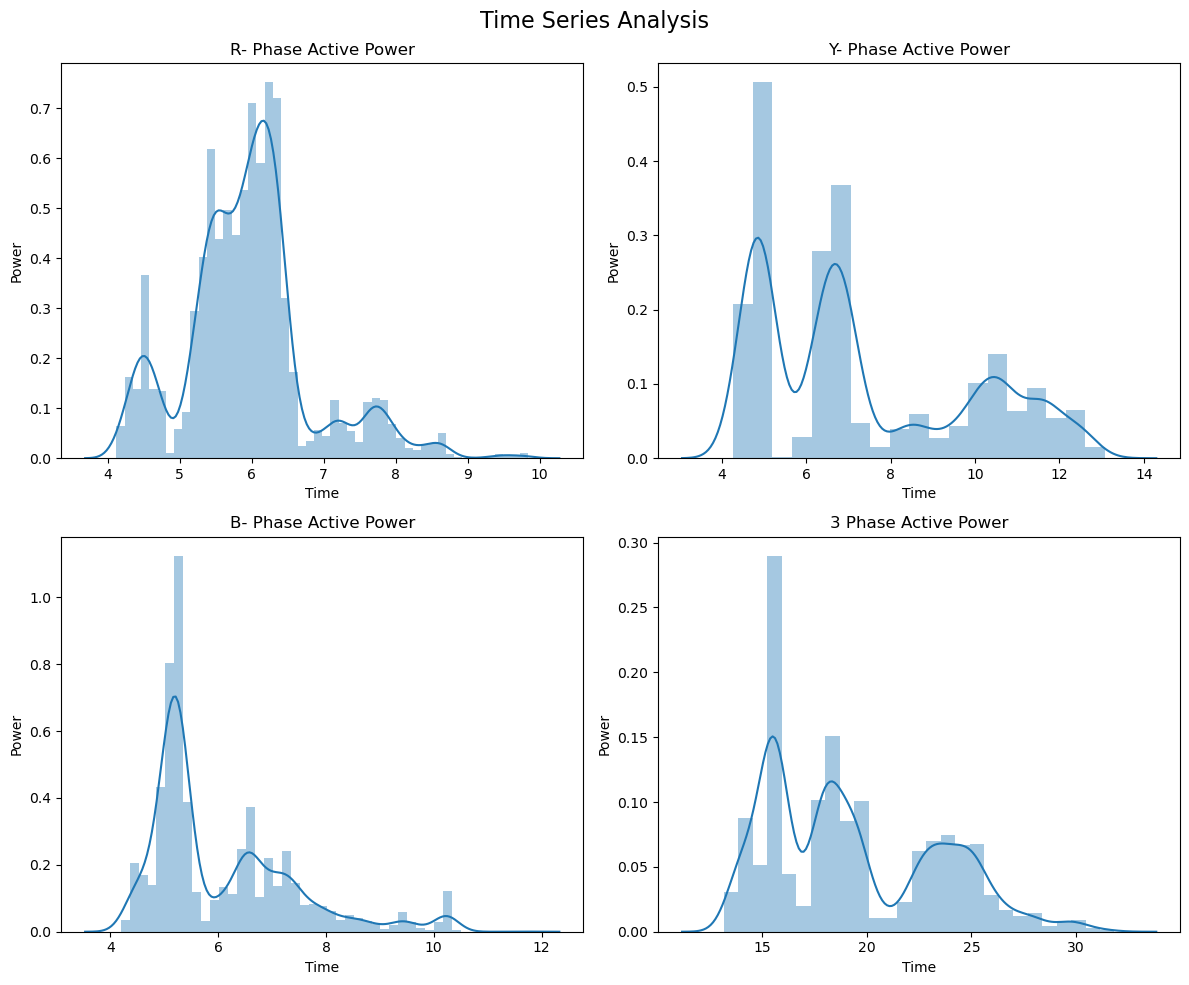

In [36]:
columns = ["R- Phase Active Power", "Y- Phase Active Power", "B- Phase Active Power", "3 Phase Active Power"]
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
for ax, column in zip(axs.flatten(), columns):
    sns.distplot(data[column], ax = ax)
    ax.set_title(column)
    ax.set_xlabel("Time")
    ax.set_ylabel("Power")
fig.suptitle("Time Series Analysis", fontsize=16)
plt.tight_layout()
plt.show()

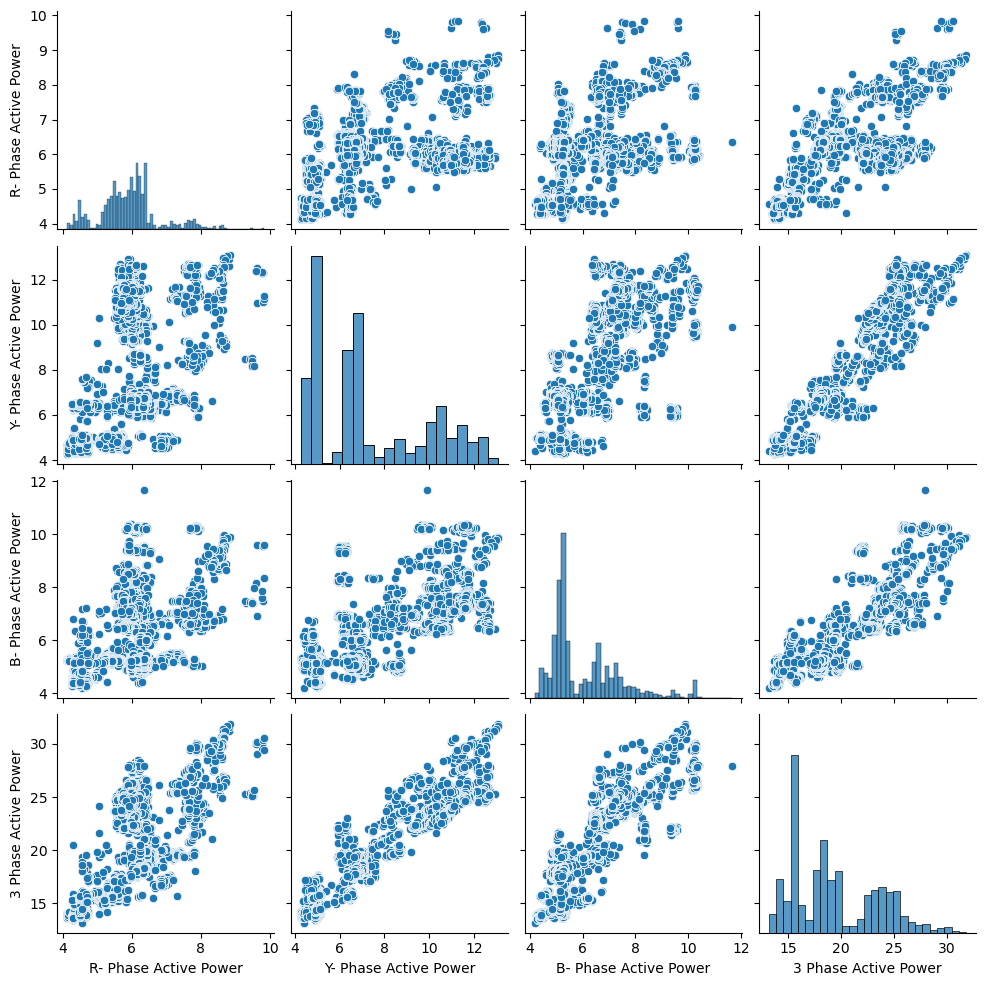

In [37]:
sns.pairplot(data)

<Axes: >

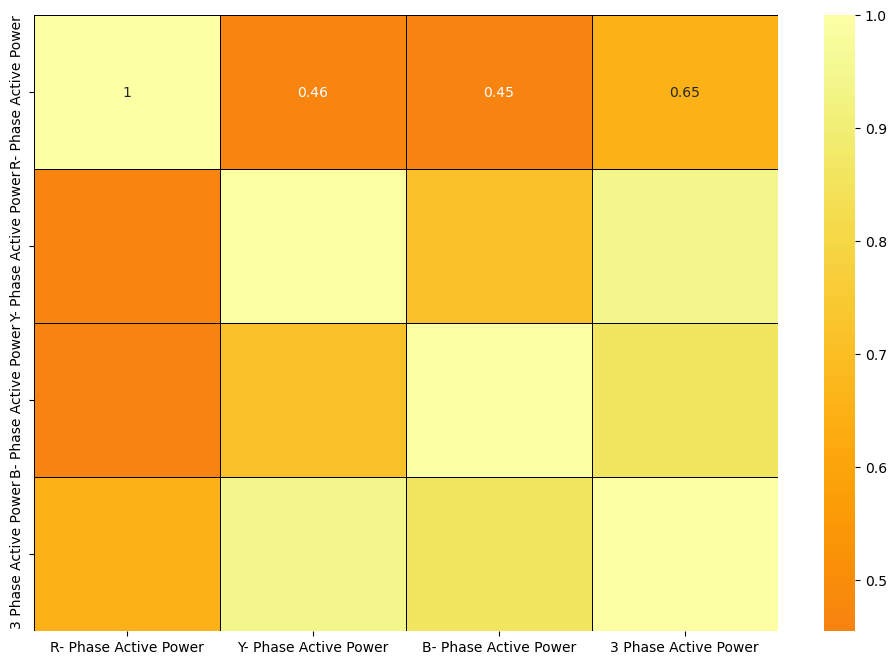

In [38]:
plt.figure(figsize = (12, 8))
sns.heatmap(num_data.corr(), annot = True, cmap = "inferno", linewidths = 0.5, linecolor = "black", center = 0)

# Analysis Terminated